# Quantum-computing

**Objective**:this module outlines the fundamental concepts of qubits, quantum gates, and quantum measurement, as well as the implications of quantum entanglement and decoherence.

## 1. Introduction

**Quantum computer** is a type of computing device that uses phenomena of quantum mechanics (such as quantum superposition and quantum entanglement) to process data. This theoretically makes it possible to explore many computational paths at once, giving quantum computers a significant advantage over classical computers in specific classes of problems that exhibit exponential computational growth and in modeling quantum or probabilistic systems. In this case, the elementary units of information are qubits, which are analogous to bits used in classical computers [1]. 

In Fig. 1, a Millikelvin quantum research control chip developed by [Intel](https://newsroom.intel.com/new-technologies/quantum-computing-chip-to-advance-research) is shown on the left, and a new quantum chip presented by [Microsoft](https://quantum.microsoft.com/en-us/solutions/microsoft-quantum-hardware) is shown on the right.
<div style="text-align: center;">
<img src="Figures/QC.png" alt="Quantum computing" width="50%"  />
</div>

The history of quantum computing development started in the early 1900s when the foundations of quantum mechanics were established by Max Planck (Quantum hypothesis), Albert Einstein (Light quanta), Niels Bohr (Quantum atom), Werner Heisenberg and Erwin Schrödinger (Quantum mechanics formalized). Their revolutionary discoveries later formed the basis for ideas about quantum information and computation.

The Turing machine, developed by Alan Turing in the 1930s, is a theoretical device that consists of tape of unlimited length that is divided into little squares. Each square can either hold a symbol (1 or 0) or be left blank. A read-write device reads these symbols and blanks, which gives the machine its instructions to perform a certain program. 

In the 1960s and 1970s, researchers such as Rolf Landauer and Charles Bennett introduced the idea that information is physical and explored reversible computation, setting the stage for quantum computational theory.

The first concept of a quantum computer emerged in the 1980s through Benioff’s quantum Turing machine, Feynman’s proposal to simulate quantum systems using quantum devices, and Deutsch’s universal quantum computer model. 

The field gained major momentum in the 1990s when Peter Shor and Peter Shor developed groundbreaking algorithms that showed quantum computers could outperform classical machines.

Over the past decade, quantum computing has transitioned from theoretical constructs to early-stage implementation. IBM, Google, and other institutions have demonstrated quantum devices with increasing qubit counts and improved fidelity. 

Developments from 2023 to 2025 have included scalable error-corrected architectures and hybrid classical–quantum frameworks. But the field is still in its early stage with a lot of problem in building reliable quantum hardware faces a decoherance, noise .... Software development is constrained by the high-level abstarction. 

## 2. Fundamentals of Quantum Computing

**Quantum computing** builds on the principles of **quantum mechanics** to redefine how information is represented, manipulated and measured in quantum systems.

|Classical computing|Quantum computing|
|:-------------------:|:-----------------:|
|**Bit**                |**Qubit**            |
|Represents a binary variable with two discrete states: 0 or 1|Represents a superposition of the quantum states $ \ket{0}\equiv \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $ \ket{1} \equiv \begin{bmatrix} 0 \\ 1 \end{bmatrix} $ in a complex [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space).|
|Finite set of two possible states|Continuum of possible states on the Bloch sphere (Fig. 2)|

### 2.1. Qubits and superposition

Like <u>bits</u> for classical computing, <u>qubits</u> (quantum bits) are the <u>basic units of quantum information</u>. 



Given the vector-space framework postulated by quantum mechanics, the state $\ket{\psi}$ of a qubit can be expressed as a linear combination of the chosen basis states:

$$ \ket{\psi} = \alpha \ket{0} + \beta \ket{1} \tag{1}$$

where $\alpha \text{ and } \beta \in \mathbb{C}$ are complex numbers, known as the amplitudes of the state $\ket{\psi}$ and determine the probabilities of obtaining $ \ket{0} $ or $ \ket{1} $, respectively. Under the normalization condition for quantum state vectors, we require $ |\alpha |^2 + |\beta|^2 = 1$. 

From Equation (1), the state $\ket{\psi}$ is expressed as a linear combination (superposition) of the two basis states $ \ket{0} $ and $ \ket{1} $. This corresponds to the principle of <b><u>superposition</u></b> which states that:

    A quantum system (such as a qubit) can exist simultaneously in multiple states, and any linear combination of basis states is also a valid quantum state.

The state of a qubit is often represented geometrically by the Bloch sphere (see Fig.2).


<div style="text-align: center;">
<img src="Figures/Bloch sphere.png" alt="Bloch sphere" width="20%"  />

Fig.2. Bloch sphere: geometrical representation of the state vector of a single qubit system in spherical coordinates. A pure state $ \ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ is represented by a point on the surface of the sphere, <br> with $\alpha = e^{i\delta}\cos \frac{\theta}{2} $ and $ \beta = e^{i (\delta+\phi)} \sin \frac{\theta}{2}$. For a single qubit, the global phase of the state $  e^{i\delta}$ has no physically observable consequences, so we can arbitrarily choose $\alpha$ to be real (see Eq.2). <br>The opposit points representing orthogonal states like $\ket{0}$ and $\ket{1}$ .


A pure quantum state of a single qubit is represented by a point on the surface of the Bloch sphere, where $\theta$, $ \phi \in \real$ are the spherical coordinates:

$$ \boxed {\ket{\psi} = \cos \begin{pmatrix} \frac{\theta}{2} \end{pmatrix} \ket{0} + e^{i \phi} \sin \begin{pmatrix} \frac{\theta}{2} \end{pmatrix} \ket{1}} \tag{2}$$

</div>

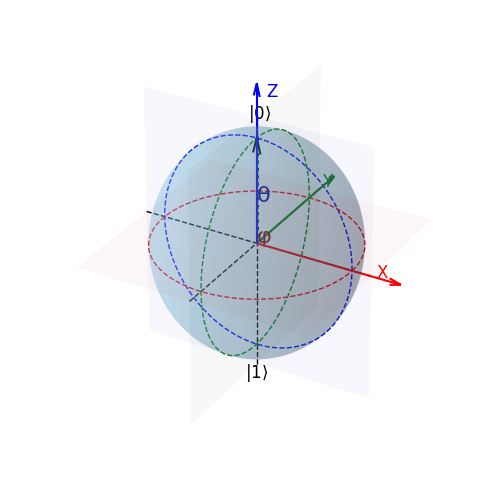

In [133]:
import numpy as np
from ipywidgets import VBox, HBox, FloatSlider, HTML, interactive_output
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib widget
import ipympl


# -------------------------------
# Figure setup
# -------------------------------
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])
ax.grid(False)
ax.set_axis_off()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.canvas.header_visible = False
fig.canvas.footer_visible = False


# -------------------------------
# Draw Bloch sphere
# -------------------------------
# Transparent but smooth Bloch sphere
u, v = np.mgrid[0:2*np.pi:120j, 0:np.pi:60j]  # denser mesh for smoothness
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)

# Transparent surface with subtle shading
ax.plot_surface(xs, ys, zs, color='skyblue', alpha=0.25, rstride=1, cstride=1, shade=True)


# Planes y=0 and z=0
px = np.linspace(-1.2,1.2,50)
pz = np.linspace(-1.2,1.2,50)
PX, PZ = np.meshgrid(px, pz)
ax.plot_surface(PX, 0*PX, PZ, color='blue', alpha=0.03)

px2 = np.linspace(-1.2,1.2,50)
py2 = np.linspace(-1.2,1.2,50)
PX2, PY2 = np.meshgrid(px2, py2)
ax.plot_surface(PX2, PY2, 0*PX2, color='red', alpha=0.03)

# Plane x=0 (YZ plane)
py = np.linspace(-1.2, 1.2, 50)
pz = np.linspace(-1.2, 1.2, 50)
PY, PZ = np.meshgrid(py, pz)
ax.plot_surface(0*PY, PY, PZ, color='green', alpha=0.03)  # green translucent plane

# Axes
ax.quiver(0,0,0,1.5,0,0,color='r', arrow_length_ratio=0.08)
ax.quiver(0,0,0,0,1.5,0,color='g', arrow_length_ratio=0.08)
ax.quiver(0,0,0,0,0,1.5,color='b', arrow_length_ratio=0.08)
ax.text(1.25,0,0,'X', color='r', fontsize=12)
ax.text(0,1.25,0,'Y', color='g', fontsize=12)
ax.text(0.1,0,1.4,'Z', color='b', fontsize=12)

# -----------------------------------------
# Quantum state labels that rotate in 3D
# -----------------------------------------

# |0> at north pole
ax.text(0, 0.05, 1.2, r"$|0\rangle$", color="k", fontsize=12,
        horizontalalignment='center', verticalalignment='center')

# |1> at south pole
ax.text(0, 0, -1.3, r"$|1\rangle$", color="k", fontsize=12,
        horizontalalignment='center', verticalalignment='center')

# -------------------------------
# Initial angles
# -------------------------------
theta0_deg = 0
phi0_deg   = 0
theta0 = np.deg2rad(theta0_deg)
phi0   = np.deg2rad(phi0_deg)

x = np.sin(theta0)*np.cos(phi0)
y = np.sin(theta0)*np.sin(phi0)
z = np.cos(theta0)

# Store artists
artists = {}
artists['bloch_vec'] = ax.quiver(0,0,0,x,y,z,color='k', arrow_length_ratio=0.15)
artists['phi_arc'], = ax.plot([], [], [], 'r', lw=2)
artists['theta_arc'], = ax.plot([], [], [], 'b', lw=2)

artists['phi_label'] = ax.text(0,0,0,'', color='darkred', fontsize=12)
artists['theta_label'] = ax.text(0,0,0,'', color='darkblue', fontsize=12)

artists['proj_xy'], = ax.plot([], [], [], 'k:', lw=2)   # dotted XY-plane projection
artists['proj_z'],  = ax.plot([], [], [], 'k:', lw=2)  # Z-axis projection
artists['origin_to_xy'], = ax.plot([], [], [], 'k:', lw=1.5)



line_pts = np.linspace(-1.2, 1.2, 100)

# Intersection of XY plane (z=0) and XZ plane (y=0) → x-axis
ax.plot(line_pts, 0*line_pts, 0*line_pts, 'k--', lw=1)

# Optional: intersection of XY and YZ planes → y-axis
ax.plot(0*line_pts, line_pts, 0*line_pts, 'k--', lw=1)

# Optional: intersection of XZ and YZ planes → z-axis
ax.plot(0*line_pts, 0*line_pts, line_pts, 'k--', lw=1)

# -------------------------------
# Intersection of planes with the sphere (dotted)
# -------------------------------
phi_vals = np.linspace(0, 2*np.pi, 200)

# Intersection with y=0 plane (XZ plane)
x_y0 = np.cos(phi_vals)
y_y0 = np.zeros_like(phi_vals)
z_y0 = np.sin(phi_vals)
ax.plot(x_y0, y_y0, z_y0, 'b--', lw=1)

# Intersection with z=0 plane (XY plane)
x_z0 = np.cos(phi_vals)
y_z0 = np.sin(phi_vals)
z_z0 = np.zeros_like(phi_vals)
ax.plot(x_z0, y_z0, z_z0, 'r--', lw=1)

# Intersection with x=0 plane (YZ plane) → cyan dotted
x_x0 = np.zeros_like(phi_vals)
y_x0 = np.cos(phi_vals)
z_x0 = np.sin(phi_vals)
ax.plot(x_x0, y_x0, z_x0, 'g--', lw=1)  # cyan dotted

info_box = HTML()

def add_2d_label(text, x, y, z, ax, dx=0.0, dy=0.0, size=14, color='k'):
    """Places screen-aligned text near a 3D point."""
    X, Y, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
    ax.text2D(X + dx, Y + dy, text, fontsize=size, color=color)

# -------------------------------
# Sliders
# -------------------------------
theta_slider = FloatSlider(value=theta0_deg, min=0, max=180, step=1, description='θ°')
phi_slider   = FloatSlider(value=phi0_deg, min=0, max=360, step=1, description='φ°')

# -------------------------------
# Update function
# -------------------------------
def update(theta_deg, phi_deg, artists=artists):
    theta = np.deg2rad(theta_deg)
    phi = np.deg2rad(phi_deg)

    alpha = np.cos(theta/2)
    beta  = np.exp(1j*phi) * np.sin(theta/2)

    # Update Bloch vector
    artists['bloch_vec'].remove()
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    artists['bloch_vec'] = ax.quiver(0,0,0,x,y,z,color='k', arrow_length_ratio=0.15)
  
  
   # Remove old surfaces if they exist
    if 'phi_surface' in artists:
        artists['phi_surface'].remove()
    if 'theta_surface' in artists:
        artists['theta_surface'].remove()

    # Scale factor for arcs
    r = 0.4

    # φ arc (red)
    phi_vals = np.linspace(0, phi, 50)
    r_vals = np.linspace(0, r, 2)
    PHI, R = np.meshgrid(phi_vals, r_vals)
    X = R * np.cos(PHI) * np.sin(theta)
    Y = R * np.sin(PHI) * np.sin(theta)
    Z = R * np.zeros_like(PHI)
    artists['phi_surface'] = ax.plot_surface(X, Y, Z, color='red', alpha=0.3)
    
    # φ arc edge line
    X_edge = r * np.cos(phi_vals) * np.sin(theta)
    Y_edge = r * np.sin(phi_vals) * np.sin(theta)
    Z_edge = np.zeros_like(phi_vals)
    if 'phi_edge' in artists:
        artists['phi_edge'].remove()
    artists['phi_edge'], = ax.plot(X_edge, Y_edge, Z_edge, color='darkred', lw=2)

    
    # θ arc (blue)
    theta_vals = np.linspace(0, theta, 50)
    r_vals = np.linspace(0, r, 2)
    THETA, R = np.meshgrid(theta_vals, r_vals)
    VX = np.cos(phi)
    VY = np.sin(phi)
    X = R * np.sin(THETA) * VX
    Y = R * np.sin(THETA) * VY
    Z = R * np.cos(THETA)
    artists['theta_surface'] = ax.plot_surface(X, Y, Z, color='blue', alpha=0.3)

    # θ arc edge line
    X_edge = r * np.sin(theta_vals) * VX
    Y_edge = r * np.sin(theta_vals) * VY
    Z_edge = r * np.cos(theta_vals)
    if 'theta_edge' in artists:
        artists['theta_edge'].remove()
    artists['theta_edge'], = ax.plot(X_edge, Y_edge, Z_edge, color='darkblue', lw=2)

 
    # φ and θ labels
    if 'phi_label' in artists:
        artists['phi_label'].remove()
    if 'theta_label' in artists:
        artists['theta_label'].remove()

    phi_mid = phi / 2
    x_phi = r * np.cos(phi_mid) * np.sin(theta)
    y_phi = r * np.sin(phi_mid) * np.sin(theta)
    z_phi = 0

    theta_mid = theta / 2
    VX = np.cos(phi)
    VY = np.sin(phi)
    x_theta = r * np.sin(theta_mid) * VX
    y_theta = r * np.sin(theta_mid) * VY
    z_theta = r * np.cos(theta_mid)

    # Add screen-aligned labels
    artists['phi_label'] = ax.text2D(
        *proj3d.proj_transform(x_phi, y_phi, z_phi, ax.get_proj())[:2],
        "φ", fontsize=16, color='darkred'
    )

    artists['theta_label'] = ax.text2D(
        *proj3d.proj_transform(x_theta, y_theta, z_theta, ax.get_proj())[:2],
        "θ", fontsize=16, color='darkblue'
    )

    # --- Projection ONTO Z-axis (vertical) ---
    artists['proj_z'].set_data([0,x], [0,y])
    artists['proj_z'].set_3d_properties([z, z])  # dashed line to Z axis

    # --- Projection ONTO XY-plane (vector shadow) ---
    artists['proj_xy'].set_data([x, x], [y, y])  
    artists['proj_xy'].set_3d_properties([z, 0])   # dotted line down to plane
   
    # --- Line from origin (0,0,0) to XY-plane projection (x,y,0) ---
    artists['origin_to_xy'].set_data([0, x], [0, y])
    artists['origin_to_xy'].set_3d_properties([0, 0])


    # Update info
    info_box.value = (
        # f"<b>θ = {theta_deg:.1f}°</b> &nbsp;&nbsp;"
        # f"<b>φ = {phi_deg:.1f}°</b><br>"
        f"α =  {alpha:.3f}, &nbsp;&nbsp;&nbsp;"
        f"β = {beta.real:.3f} + {beta.imag:.3f} i"
    )
    # fig.canvas.draw_idle()
    fig.canvas.draw()


# -------------------------------
# Interactive output
# -------------------------------


out = interactive_output(update, {'theta_deg': theta_slider, 'phi_deg': phi_slider})

# Layout: figure left, sliders right
controls = VBox([theta_slider, phi_slider, info_box])
display(HBox([controls]))

# layout=Layout(align_items='center', justify_content='center')
# Initialize
update(theta0_deg, phi0_deg)


To creat <u>superposition</u> in a qubit, the Hadamard gate is widely used. The **Hadamard gate** acts on a single qubit and converts a definite state $\ket{0}$ or $\ket{1}$ into a superposition of both states:

$$
\text{H} \ket{0} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}),
$$

$$
\text{H} \ket{1} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1}),
$$

where $ \text{H} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} $.

The basic types of gates (the quantum analogue of logical gates in classical computing) used in the quantum computing will be discussed in more detal later (see ...).

The principle of superposition allows quantum systems to exist as a blend of  $\ket{0}$ and $\ket{1}$ simultaneously. This is what enables quantum computers to perform computations on many possibilities at once. This phenomenon is often referred to as <u>quantum parallelism</u> and provides the potential for speedup in certain algorithms.

Like a single qubit, a two-qubit system can exist in a superposition of the four states forming $\ket{00}$, $\ket{01}$, $\ket{10}$ and $\ket{11}$ (here  $\ket{01}$ means qubit-1 is in state $\ket{0}$ and qubit-2 is $\ket{1}$ etc.). We can use a tensor product to relate it as $\ket{01} =  \ket{0} \otimes \ket{1} $. The general state of a two-qubit system can be written as:

$$ \ket{\psi} = \alpha _0 \ket{00} + \alpha _1 \ket{01} + \alpha _2 \ket{10} + \alpha _3 \ket{11}, \tag{3} $$

with $ \alpha _0, \alpha _1, \alpha _2, \alpha _3 \in \mathbb{C}$ and $|\alpha _0 |^2 + |\alpha _1 |^2 + |\alpha _2 |^2 |\alpha _3 |^2 = 1$.

In practical terms, while a classical computer with $n$ bits can represent only one of $2^n$ possible states at any given time, a quantum computer with $n$ qubits can represent a superposition over all potential states simultaneously. This capability allows quantum computers to explore many possible solutions at once, rather than checking them one by one. 

Generalizing Eq.(3) to an $n$-qubit system, the state can be written as a superposition of all $2^n$ basis state:

$$ \ket{\psi} = \sum_{i=0}^{2^2-1} \alpha_i \ket{i}, \tag{4} $$

with $ \alpha _i \in \mathbb{C}: \sum_{i=0}^{2^n-1} |\alpha _i |^2 = 1$.

Here, each $\ket{i}$ represents a basis state of $n$ qubits, where the integer $i$ is expressed in binary form to indicate the state of each qubit. For example, in a three-qubit system, the basis states can be written explicitly as:

$$
\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}.
$$

In general, the binary digits of $i$ correspond directly to the states of qubit-1, qubit-2, ..., qubit-$n$, from left to right. This notation allows us to label all $2^n$ possible states compactly.


### 2.2. Measurement

In quantum mechanics concept of <u>measurement</u> plays a crucial role in determining the outcome of a quantum experiment and is fundamentally different from classical measurement. The basic principles of this concept are set out in the Postulate of Measurement (Eigenstate Formulation):






This postulat is a core rule in quantum mechanics that governs how we extract information from a quantum system. It explaines the probabilistic nature of observation and the irreversible change it causes and 

- A qubit is in a superposition state $ \ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ (a blend of $\ket{0}$ and $\ket{1}$). The act of measurement forces the qubit to **collapses** into one of the definite classical state, so the observed result is always either 0 or 1, never a mixture of both.

- The outcomes of measurements are inherently **probabilistic** and are determined by the amplitudes of the qubit’s state: the probabilities of observing 0 or 1 are $ |\alpha |^2$ and $|\beta|^2 $ , respectively.

- The measurement process in quantum computing is **irreversible**: once a measurement is performed, the information about the original superposition is lost. This phenomenon, known as the collapse of the wavefunction, is a fundamental concept in quantum mechanics.

Because quantum measurement is probabilistic, quantum computers must run the same quantum circuit multiple times - often thousands of times, called "shots" - to estimate these probabilities experimentally. The final result of the quantum computation is therefore not a single 0 or 1, but a statistical distribution of measurement outcomes.


Let an observable $A$ be a Hermitian operator with eigenstates $\{\ket{a_i}\}$ (états propres) and corresponding eigenvalues $\{a_i\}$:
$$
A \ket{a_i} = a_i \ket{a_i}.
$$

If the system is in a state $\ket{\psi}$, then:

1. \textbf{Possible measurement outcomes:} the result of measuring $A$ is always one of its eigenvalues $a_i$.

2. \textbf{Probability of outcome $a_i$:} 
$$
p(a_i) = |\langle a_i | \psi \rangle|^2.
$$

3. \textbf{State after measurement (collapse):} if outcome $a_i$ is observed, the system collapses to the corresponding eigenstate:
$$
\ket{\psi'} = \ket{a_i}.
$$

4. \textbf{Normalization condition:} 
$$
\sum_i p(a_i) = \sum_i |\langle a_i | \psi \rangle|^2 = 1.
$$

---

\textbf{Relation to Quantum Computing:}

- A qubit is in a superposition state 
$$
\ket{\psi} = \alpha \ket{0} + \beta \ket{1},
$$ 
where $\ket{0}$ and $\ket{1}$ are the eigenstates of the computational basis measurement operator $Z$.

- Upon measurement in this basis, the qubit collapses to either $\ket{0}$ or $\ket{1}$ with probabilities 
$$
p(0) = |\alpha|^2, \quad p(1) = |\beta|^2.
$$

- The measurement is \textbf{irreversible}: once performed, the original superposition is destroyed, and only the observed classical outcome remains.

- Because measurement is probabilistic, quantum circuits are often run multiple times (called \emph{shots}) to estimate the distribution of outcomes. The final result is thus a statistical distribution of measurement outcomes rather than a single deterministic value.


The Measurement Postulate is a core rule in quantum mechanics that governs how we extract information from a quantum system. 


It fundamentally explains the probabilistic nature of observation and the irreversible change it causes.

1. Observables and Measurable Values: Every measurable physical quantity (an Observable) in quantum mechanics is represented by a Hermitian operator ($\hat{A}$). The only possible results one can obtain from measuring an observable $A$ are the eigenvalues ($a_n$) of that operator.

2. Own State (Eigenstate): Each measurable value $a_n$ is associated with a specific quantum state, known as the eigenstate ($\ket{\phi_n}$). If a system is already in an eigenstate $\ket{\phi_n}$, a measurement is certain to yield the corresponding eigenvalue $a_n$.b. 

3. Probability of Outcome (Born Rule): If a system is in an arbitrary quantum state $\ket{\psi}$ (which is typically a superposition of eigenstates), the probability $P(a_n)$ of obtaining the eigenvalue $a_n$ upon measurement is determined by the overlap between the state $\ket{\psi}$ and the corresponding eigenstate $\ket{\phi_n} $:

$$ 
    P(a_n) = |\langle\phi_n|\psi\rangle|^2. 
$$  

4. State Collapse (Projection): The act of measurement is an instantaneous, non-unitary process. Immediately after the measurement yields the result $a_n$, the state of the system $\ket{\psi}$ irreversibly collapses (or projects) onto the corresponding normalized eigenstate $\ket{\phi_n}$.$$\vert\psi\rangle \xrightarrow{\text{Measurement}} \vert\phi_n\rangle$$2. 

Relation to Quantum ComputingThe concepts above are directly implemented when operating a quantum computer, specifically in the process of reading out the qubit's final state.In quantum computing:The Observable: The measured observable is usually the Z-component of the qubit's spin/energy, represented by the Pauli-Z operator ($\hat{Z}$).The Own States (Eigenstates): The two eigenstates for a qubit are the computational basis states $\ket{0}$ and $\ket{1}$.The Measurable Values: The results are mapped to the classical values 0 and 1.When you measure a qubit in a quantum computer, the measurement postulate dictates the following consequences (as described in your text):A qubit is in a superposition state $ \ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ (a blend of $\ket{0}$ and $\ket{1}$). The act of measurement forces the qubit to collapses into one of the definite classical state, so the observed result is always either 0 or 1, never a mixture of both.This is the State Collapse (Projection) Postulate in action. The qubit's state projects onto either the $\ket{0}$ or $\ket{1}$ eigenstate.The outcomes of measurements are inherently probabilistic and are determined by the amplitudes of the qubit’s state: the probabilities of observing 0 or 1 are $ |\alpha |^2$ and $|\beta|^2 $ , respectively.This is the Born Rule Postulate in action. The probability of seeing a 0 is $P(0) = |\langle 0|\psi\rangle|^2 = |\alpha|^2$, and the probability of seeing a 1 is $P(1) = |\langle 1|\psi\rangle|^2 = |\beta|^2$.The measurement process in quantum computing is irreversible: once a measurement is performed, the information about the original superposition is lost. This phenomenon, known as the collapse of the wavefunction, is a fundamental concept in quantum mechanics.This confirms the irreversible nature of the Projection Postulate. The original superposition state $\ket{\psi}$ is destroyed and replaced by the newly measured eigenstate ($\ket{0}$ or $\ket{1}$).Because quantum measurement is probabilistic, quantum computers must run the same quantum circuit multiple times - often thousands of times, called "shots" - to estimate these probabilities experimentally. The final result of the quantum computation is therefore not a single 0 or 1, but a statistical distribution of measurement outcomes.This practical necessity stems directly from the Probabilistic Outcome Postulate (Born Rule). Since the output of a single run is random, only by repeating the experiment many times can we determine the probability distribution that the quantum algorithm was designed to compute.

### 2.3. Entanglement


Quantum computers also utilize another aspect of quantum mechanics known as entanglement: to make a practical quantum computer, scientists have to devise ways of making measurements indirectly to preserve the system's integrity. Entanglement provides a potential answer. 

<u>Entanglement</u> is a uniquely quantum mechanical proprety wherein the state of one qubit is dependent on the state of another, regardless of spatial separation. For two qubits

A pair of particles start out each in a quantum superposition of energy state 0 and energy state 1. Because the particles are also entangled with each other, when one is measured (represented by a ruler), both must randomly “collapse” such that one is fully in state 0 and the other is fully in state 1. The collapse is instantaneous for both particles, no matter how far apart they are.

When multiple qubits are <u>entangled</u>, the number of representable states grows exponentially, which underpins the computational advantage of quantum systems. 


Quantum particles can become deeply connected, so much so that changing one instantly affects the other, even if they’re miles apart. This property allows for faster communication and stronger correlation between qubits.

### 2.4. Practice: Exploring Qubits with Qiskit

The Python libraries such as Qiskit make it possible to build and run quantum circuits directly from [Python](https://realpython.com/quantum-computing-basics/). 

Below, you will find the exercises in Pyhthon that demonstrates how to create quantum circuits, initialize the value of a qubit, and illustrate the principle of superposition using the **Hadamard gate** (often denoted as H) ....add another about measurements... 

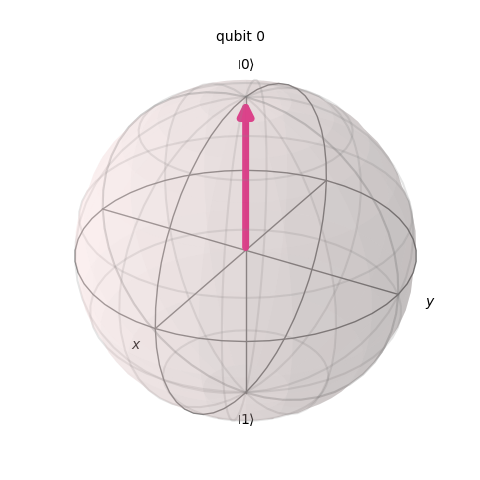

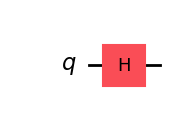

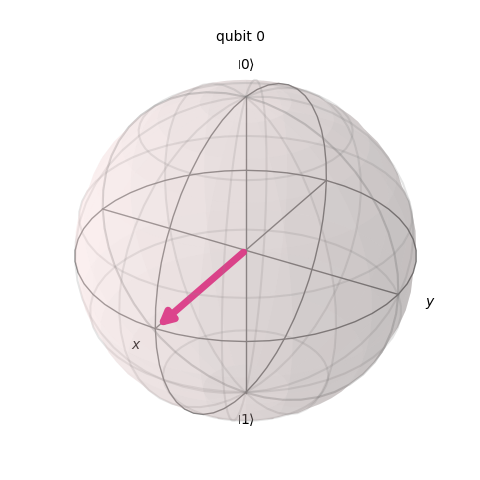

In [134]:
# Create a circuit, Visualise the initial and 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Creates a circuit with 1 qubit
qc = QuantumCircuit(1)

# Visualiztion initial Bloch vector
fig1 = plot_bloch_multivector(qc)
# Apply Hadamard gate
qc.h(0)
# Draw the circuit
fig2 = qc.draw('mpl')
# Visualiztion Bloch vector berfore applied Hadamard gate
fig3 = plot_bloch_multivector(qc)

# Hide header/footer for all open figures at once
for fig in plt._pylab_helpers.Gcf.get_all_fig_managers():
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    To illustrate this, let's consider an example. Suppose we have a qubit prepared in the state |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩. If we measure this qubit, there is a 50% chance of obtaining the outcome 0 and a 50% chance of obtaining the outcome 1. After the measurement, the qubit will collapse into one of these two states, and we will know the measurement outcome. exercise!!!!!

### Key Concept

fundamental principles of quantum mechanics that are the core principles used in quantum computing.

1. Superposition: A qubit can be in a superposition of 0 and 1. This means its state is a precise combination of both until measurement forces it to become either 0 or 1.

A qubit can hold many possible states at once.

This lets quantum computers process many possibilities in parallel.

This means that while a classical computer with n bits can represent only one of 2n possible states at any given time, a quantum computer with n qubits can represent a superposition over all 2n potential states simultaneously. This is what allows quantum computing to explore many possible solutions at once instead of checking them one by one.

Superposition is powerful on its own, but it leads to two other uniquely quantum properties that make quantum computing different: entanglement and interference.

2. Entanglement: creates strong correlations between two or more qubits, so measuring one tells you something about the others that you can’t explain with classical reasoning alone.

Two qubits can become entangled, meaning:

- Changing one instantly affects the other,

- Even if they are far apart.

This creates very strong correlations that classical computers cannot replicate naturally.

3. Interference: adjusts probability amplitudes so that wrong outcomes cancel and useful outcomes reinforce.

Quantum states can interfere with each other — like waves.
Interference can be used to amplify correct answers and cancel out wrong ones in algorithms.

4. Measurement (Wavefunction Collapse)

In quantum mechanics, observing a particle forces it to take on a definite state.

5. Unitarity (Evolution is reversible)

Quantum evolution is described by unitary matrices.

6. Quantum Tunneling

Not a requirement for logic, but important for physical qubit implementations.

7. Decoherence

In quantum mechanics, interaction with the environment destroys quantum states.

8. The No-Cloning Theorem

Quantum states cannot be copied exactly.

9. Uncertainty Principle

You can’t know certain pairs of properties simultaneously.

With Python libraries like Qiskit, you can build and run quantum circuits directly from [Python](https://realpython.com/quantum-computing-basics/).
you’ll only focus on how to design a circuit using quantum gates.

<table>
<tr>
  <th style="width: 20%;">Concept</th>
  <th style="width: 40%;"> Quantum Mechanics</th>
  <th style="width: 40%;">Quantum Computing</th>

</tr>
<tr>
  <td>Superposition</td>
  <td>
    The states that are linear combinations of solutions to the Schrödinger equation are also solutions of the Schrödinger equation: Particles exist in combinations of states. 
    <br>Leads to physical phenomena: Interference, Quantum entanglement, Quantum tunneling, Wave–particle duality, Decoherence, Quantum parallelism
  </td>
    <td>
    A qubit can hold multiple possible states at once. This allows quantum computers to explore many solutions in parallel.
  </td>
</tr>
<tr>
  <td>Entanglement</td>
  <td>
    The phenomenon wherein the quantum state of each particle in a group cannot be described independently of the state of the others, even when the particles are separated by a large distance.  Quantum particles share a single unified state.
  </td>
  <td>
    Used for quantum algorithms, teleportation.
  </td>
</tr>
<tr>
  <td>Interference</td>
  <td>
    Wavefunctions add/cancel like waves.
  </td>
  <td>
    Used to amplify correct answers.
  </td>
</tr>
</table>




    Explain the fundamental difference between classical bits and quantum bits (qubits).   
- Describe quantum-mechanical concepts that underlie their behavior.
    Include mathematical and graphical representations of qubits: quantum states & Bloch sphere
- Demonstrate these ideas using Python code and a quantum-computing library (e.g., Qiskit), showing how qubits can be simulated and manipulated.

This section will establish the foundations of quantum operation.

---

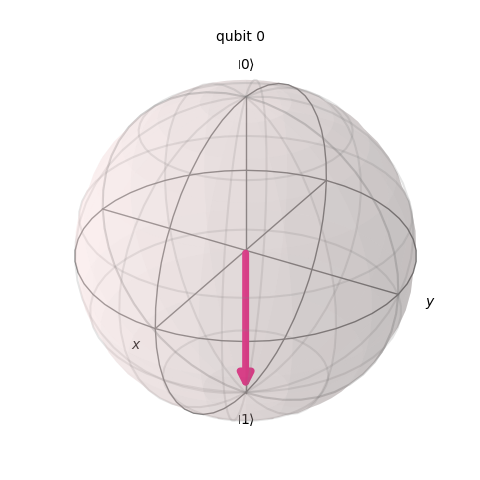

In [37]:
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# Define your amplitudes
alpha = 0
beta = 1

# Create the state vector
psi = [alpha, beta]

# Plot the Bloch sphere
plot_bloch_multivector(psi)
plt.close(fig)   # <-- this stops auto-display completely


{'1 0': 1000}


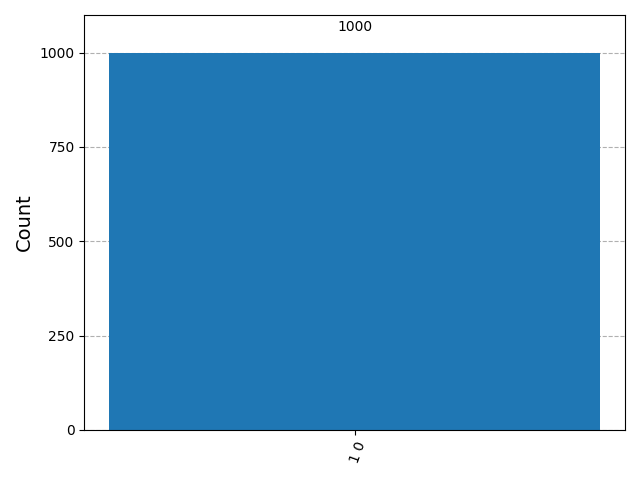

In [9]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator

# Create a 1-qubit circuit with 1 classical bit
qc = QuantumCircuit(1,1)

# Initialize the qubit
qc.initialize(psi, 0)

# Add measurement
qc.measure_all()

# Simulate
sim = AerSimulator()
result = sim.run(qc, shots=1000).result()
counts = result.get_counts()

# Measurement results
print(counts)
plot_histogram(counts)
plt.close(fig)  


## 3. Quantum gates and Circuits

### 3.2. Quantum Circuit Model

## 4. Quantum Algorithms

## 5. Physical Realisation and Quantum Hardware

## 6. Application of Quantum Computing

In [99]:
# ---------------------------------------
# Chiffrement réversible inspiré de la porte X (XOR)
# ---------------------------------------
 
def xor_encrypt_decrypt(text, key):
    """
    Chiffre ou déchiffre un texte en utilisant XOR.
    L'opération est réversible :
    XOR deux fois avec la même clé redonne le texte original.
    """
    encrypted_chars = []
    for c in text:
        encrypted_chars.append(chr(ord(c) ^ key))
    return "".join(encrypted_chars)
 
 
# Phrase à chiffrer
phrase = "le chat de schrodinger n'est pas mort mais il n'est pas vivant "
 
# Clé de chiffrement (entre 1 et 255)
key = 42
 
# --- Chiffrement ---
texte_chiffre = xor_encrypt_decrypt(phrase, key)
print("Texte chiffré :")
print(texte_chiffre)
 
# --- Déchiffrement (XOR avec la même clé) ---
texte_dechiffre = xor_encrypt_decrypt(texte_chiffre, key)
print("\nTexte déchiffré :")
print(texte_dechiffre)
 
 

Texte chiffré :
FO
IBK^
NO
YIBXENCDMOX
OY^
ZKY
GEX^
GKCY
CF
OY^
ZKY
\C\KD^


Texte déchiffré :
le chat de schrodinger n'est pas mort mais il n'est pas vivant 


In [60]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import random

# Convert text to bits and back
def text_to_bits(text):
    return ''.join(format(ord(c), '08b') for c in text)

def bits_to_text(bits):
    chars = [bits[i:i+8] for i in range(0, len(bits), 8)]
    return ''.join(chr(int(c, 2)) for c in chars)

# Quantum XOR encryption for a block of bits
def encrypt_block(block_bits, block_key):
    n = len(block_bits)
    qc = QuantumCircuit(n, n)  # 1 qubit per bit
    for i in range(n):
        if block_bits[i] == '1':
            qc.x(i)
        if block_key[i] == '1':
            qc.x(i)
        qc.measure(i, i)
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    counts = result.get_counts()
    encrypted_bits = list(counts.keys())[0][::-1]
    return encrypted_bits, qc

# Split a long bit string into blocks
def split_into_blocks(bitstring, block_size=30):
    return [bitstring[i:i+block_size] for i in range(0, len(bitstring), block_size)]

# Example text
plaintext = "Quantum Computing, Quantum Computing"
plaintext_bits = text_to_bits(plaintext)

# Generate a random key of same length
key_bits = ''.join(random.choice('01') for _ in range(len(plaintext_bits)))

# Split plaintext and key into blocks
block_size = 30  # fits within qubit limit
plaintext_blocks = split_into_blocks(plaintext_bits, block_size)
key_blocks = split_into_blocks(key_bits, block_size)

# Encrypt each block
encrypted_blocks = []
circuits = []
for p_block, k_block in zip(plaintext_blocks, key_blocks):
    e_block, qc_block = encrypt_block(p_block, k_block)
    encrypted_blocks.append(e_block)
    circuits.append(qc_block)

# Combine encrypted blocks
encrypted_bits = ''.join(encrypted_blocks)
print("Eecrypted text: ", bits_to_text(encrypted_bits))
print("Encrypted bits:", encrypted_bits)

# Decrypt by applying the same process
decrypted_blocks = []
for e_block, k_block in zip(encrypted_blocks, key_blocks):
    d_block, _ = encrypt_block(e_block, k_block)  # XOR again with same key
    decrypted_blocks.append(d_block)
decrypted_bits = ''.join(decrypted_blocks)
decrypted_text = bits_to_text(decrypted_bits)
print("Decrypted bits:", decrypted_bits)
print("Decrypted text:", decrypted_text)

# Show circuit as text (ASCII) instead of mpl
print("\nCircuit diagram:\n")
print("\nCircuit diagrams (ASCII) per block:\n")
for i, qc_block in enumerate(circuits):
    print(f"Block {i+1}:\n")
    print(qc_block.draw())
    print("-" * 40)

Eecrypted text:  pH~<÷ò±Ý7· × i"åî!hïc¡Ó0%i
Encrypted bits: 011100000100100001111110000111000011110011110111100101101000001100001011111100101001100010110001110111010011011110110111101000001101011100000000011010010010001010011111111001010000110011101110001000010110100010000011000001011110111101100011000100101010000111010011001100000010010101101001
Decrypted bits: 010100010111010101100001011011100111010001110101011011010010000001000011011011110110110101110000011101010111010001101001011011100110011100101100001000000101000101110101011000010110111001110100011101010110110100100000010000110110111101101101011100000111010101110100011010010110111001100111
Decrypted text: Quantum Computing, Quantum Computing

Circuit diagram:


Circuit diagrams (ASCII) per block:

Block 1:

      ┌─┐                                                                     »
 q_0: ┤M├─────────────────────────────────────────────────────────────────────»
      └╥┘┌───┐                               ┌─┐        

In [85]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister

qr = QuantumRegister(1, name="quantum")
cr = ClassicalRegister(1, name="classical")
qc = QuantumCircuit(qr, cr)
qc.h(0)

qc.draw()


┌───┐
    quantum: ┤ H ├
             └───┘
classical: 1/═════

In [14]:
from qiskit import QuantumCircuit

# Quantum XOR (CNOT)
qc = QuantumCircuit(2)

# Example: set the control qubit to |1⟩
qc.x(0)

# Apply XOR: CNOT(control=0, target=1)
qc.cx(0, 1)

qc.measure_all()
print(qc)


        ┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


## 3. Mathematical (Logical) Foundations

### 3.1 Logic gates

Discuss classical logic gates and compare them with quantum logic gates.
Build an analogy between classical and quantum realizations.
Provide circuit diagrams and code implementations to illustrate the conclusions.

---

Quantum gates are unitary operation for qubits.

For single-qubit gates: the Pauli-X (NOT), Pauli-Y, Pauli-Z, Hadamard (H) and phase gates

For two-qubit gates - controlled-NOT(CNOT).

### 3.2 Quantum algorithms

Review well-known quantum algorithms used in quantum computing (e.g., Grover’s algorithm, Shor’s algorithm, QFT, etc.).

Algorithms offering speedups (Grover, Shor)

Simulation algorithms (quantum simulation of molecules, Hamiltonians)

Quantum machine learning (variational circuits, QNNs)

---

## 4. Physical (hardware-level) implementation of quantum computers

Describe how qubits can be physically realized (superconducting qubits, trapped ions, photonic qubits, spin qubits, etc.).
Discuss modern challenges and limitations and briefly compare leading platforms (Google, IBM, IonQ, Rigetti)

---

## 5. Application

Explain what types of problems quantum computers can solve and where they provide advantages.

---

#### What quantum computers are good for

They are not faster for everything, but they excel at certain tasks:

- Breaking some classical cryptography
- Optimizing complex systems
- Simulating molecules and materials (chemistry)
- Certain types of searching and pattern detection

These tasks benefit from superposition and entanglement.

#### What they are not good for

- Running your apps or games

- Everyday computing tasks

- Replacing classical computers anytime soon

- Perfect reliability (qubits are fragile and error-prone)

| Aspect                         | Classical Computers                          | Quantum Computers                                                             |
| ------------------------------ | -------------------------------------------- | ----------------------------------------------------------------------------- |
| **Basic unit of information**  | Bit (0 or 1)                                 | Qubit (0 and 1 simultaneously in superposition)                               |
| **Information representation** | Deterministic (single definite state)        | Probabilistic / quantum state                                                 |
| **Key physical principles**    | Classical physics                            | Quantum mechanics (superposition, entanglement, interference)                 |
| **Processing model**           | Sequential or parallel on classical hardware | Quantum parallelism across many possible states                               |
| **Memory scaling**             | Linear—adding bits increases memory linearly | Exponential—n qubits represent 2ⁿ states                                      |
| **Error sensitivity**          | Relatively low; stable hardware              | Very high; sensitive to noise, requires error correction                      |
| **Typical hardware**           | Transistors on silicon chips                 | Superconducting qubits, trapped ions, photonic qubits, etc.                   |
| **Best for**                   | General-purpose tasks, everyday computing    | Specialized algorithms: factoring (Shor), search (Grover), quantum simulation |
| **Maturity**                   | Fully developed and widely used              | Still experimental; early-stage practical systems                             |
| **Energy usage**               | Moderate; depends on system                  | Potentially very low for some models, but often requires cryogenic cooling    |


# Bibliography

1. Memon QA, Al Ahmad M, Pecht M. Quantum Computing: Navigating the Future of Computation, Challenges, and Technological Breakthroughs. Quantum Reports. 2024, 6, 627-663. https://doi.org/10.3390/quantum6040039.

